In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


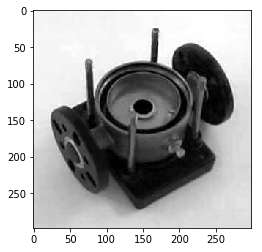

In [9]:
img=cv2.imread('wheel.png',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

dtype: uint8
shape: (298, 299)


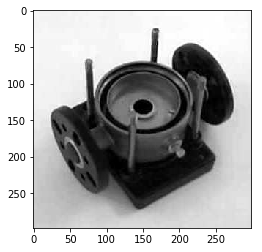

In [10]:
input_image=cv2.imread('wheel.png',cv2.IMREAD_GRAYSCALE)
print('dtype: '+str(input_image.dtype))
print('shape: '+str(input_image.shape))
plt.imshow(input_image,cmap='gray')

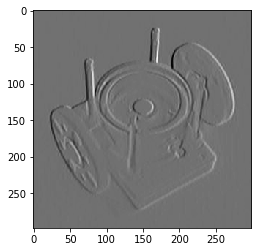

In [12]:
ddepth=cv2.CV_64F
dx=1   #first order derivative in 
dy=0   #no derivative in x direction
sobelx=cv2.Sobel(input_image,ddepth,dx,dy)
plt.imshow(sobelx,cmap='gray')

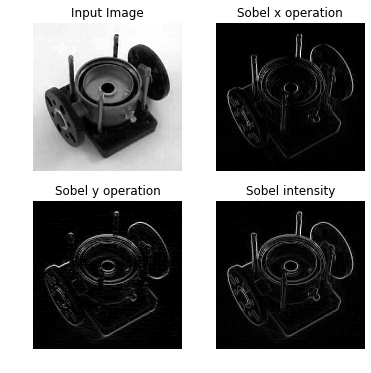

In [13]:
sobelx=cv2.Sobel(input_image,cv2.CV_64F,1,0)
sobely=cv2.Sobel(input_image,cv2.CV_64F,0,1)
sobel=cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx,2.0),1.0,cv2.pow(sobely,2.0),1.0,0.0))
plt.figure(figsize=(6,6));
plt.subplot(2,2,1);plt.title('Input Image'),plt.axis('off')
plt.imshow(input_image,cmap='gray')
plt.subplot(2,2,2);plt.title('Sobel x operation')
plt.axis('off')
plt.imshow(cv2.absdiff(sobelx,0.0),cmap='gray')
plt.subplot(2,2,3);plt.title('Sobel y operation')
plt.axis('off')
plt.imshow(cv2.absdiff(sobely,0.0),cmap='gray')
plt.subplot(2,2,4);plt.title('Sobel intensity')
plt.axis('off')
plt.imshow(sobel,cmap='gray')

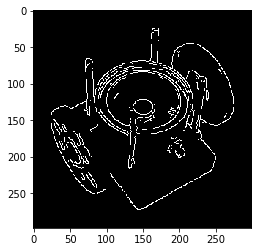

In [14]:

threshold1=100
threshold2=200
canny=cv2.Canny(input_image,threshold1,threshold2)
plt.imshow(canny,cmap='gray')

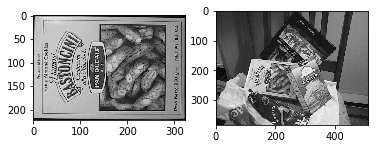

In [16]:
img1=cv2.imread('box.png')
img2=cv2.imread('box_in_scene.png')
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [19]:
import time
sift=cv2.xfeatures2d.SIFT_create()
gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
start_time=time.time()
kp1,des1=sift.detectAndCompute(gray1,None)
kp2,des2=sift.detectAndCompute(gray2,None)
print('Elapsed time: %.6fs'%(time.time()-start_time))

print('Image 1-%d feature detected'%des1.shape[0])
print('Image 2-%d feature detected'%des2.shape[0])

Elapsed time: 1.119787s
Image 1-603 feature detected
Image 2-969 feature detected


In [20]:
help(cv2)

Help on package cv2.cv2 in cv2:

NAME
    cv2.cv2 - Python wrapper for OpenCV.

PACKAGE CONTENTS
    cv2
    data (package)

CLASSES
    builtins.Exception(builtins.BaseException)
        cv2.error
    builtins.object
        cv2.Algorithm
            cv2.AlignExposures
                cv2.AlignMTB
            cv2.BackgroundSubtractor
                cv2.BackgroundSubtractorKNN
                cv2.BackgroundSubtractorMOG2
                cv2.bgsegm_BackgroundSubtractorCNT
                cv2.bgsegm_BackgroundSubtractorGMG
                cv2.bgsegm_BackgroundSubtractorGSOC
                cv2.bgsegm_BackgroundSubtractorLSBP
                cv2.bgsegm_BackgroundSubtractorMOG
            cv2.BaseCascadeClassifier
            cv2.CLAHE
            cv2.CalibrateCRF
                cv2.CalibrateDebevec
                cv2.CalibrateRobertson
            cv2.DenseOpticalFlow
                cv2.DualTVL1OpticalFlow
                cv2.FarnebackOpticalFlow
                cv2.optflow_DISOptical

In [25]:
good_matches=[]
for m,n in matches:
    if m.distance<0.75*n.distance:
        good_matches.append(m)
print('%d matches '%len(good_matches))

TypeError: cannot unpack non-iterable cv2.DMatch object

In [24]:
bf=cv2.BFMatcher(cv2.NORM_L2)
matches=bf.match(des1,des2)
print('%d matches'%len(matches))

603 matches


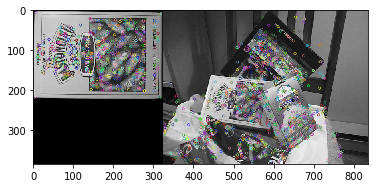

In [23]:
img3=cv2.drawMatches(img1,kp1,img2,kp2,good_matches,None)
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))